In [2]:
#Carregando os dados

import pandas as pd
import numpy as np

reco = pd.read_csv('C:/Users/yandrade/OneDrive - Sá Cavalcante/Documentos/GitHub/analise-de-dados-python/analises/dados/reconhecimento_atividade_humana.csv')

reco.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Activity
0,-1.028626,-0.105919,-0.264525,-1.235359,-0.162986,-0.483125,1.0
1,-1.046406,-0.061666,-0.255959,-1.074173,-0.275747,-0.387487,1.0
2,-1.009987,-0.054528,-0.205398,-0.803832,-0.282078,-0.316955,1.0
3,-0.988288,-0.080090,-0.184195,-0.735864,-0.302880,-0.239320,1.0
4,-0.933698,-0.110635,-0.185413,-0.703047,-0.189211,-0.102410,1.0


In [3]:
# Renomeando as colunas para melhorar a compreensão

reco.rename(columns=
            {"Feature_1":"x_baixo", 
             "Feature_2":"y_esquerda", 
             "Feature_3":"z_frente", 
             "Feature_4":"x_cima",
             "Feature_5":"y_direita",
             "Feature_6":"z_tras"}, inplace=True)

# Criando uma cópia dos dados para não manipular demais os dados de treino

reco_df = reco.copy()
reco_df.head(7)

,x_baixo,y_esquerda,z_frente,x_cima,y_direita,z_tras,Activity
0,-1.028626,-0.105919,-0.264525,-1.235359,-0.162986,-0.483125,1.0
1,-1.046406,-0.061666,-0.255959,-1.074173,-0.275747,-0.387487,1.0
2,-1.009987,-0.054528,-0.205398,-0.803832,-0.282078,-0.316955,1.0
3,-0.988288,-0.080090,-0.184195,-0.735864,-0.302880,-0.239320,1.0
4,-0.933698,-0.110635,-0.185413,-0.703047,-0.189211,-0.102410,1.0
5,-0.928483,-0.136658,-0.179933,-0.769111,-0.095082,-0.083583,1.0
6,-0.882026,-0.129124,-0.160372,-0.733306,0.019948,-0.116381,1.0


array([[<Axes: title={'center': 'x_baixo'}>,
        <Axes: title={'center': 'y_esquerda'}>,
        <Axes: title={'center': 'z_frente'}>],
       [<Axes: title={'center': 'x_cima'}>,
        <Axes: title={'center': 'y_direita'}>,
        <Axes: title={'center': 'z_tras'}>],
       [<Axes: title={'center': 'Activity'}>, <Axes: >, <Axes: >]],
      dtype=object)

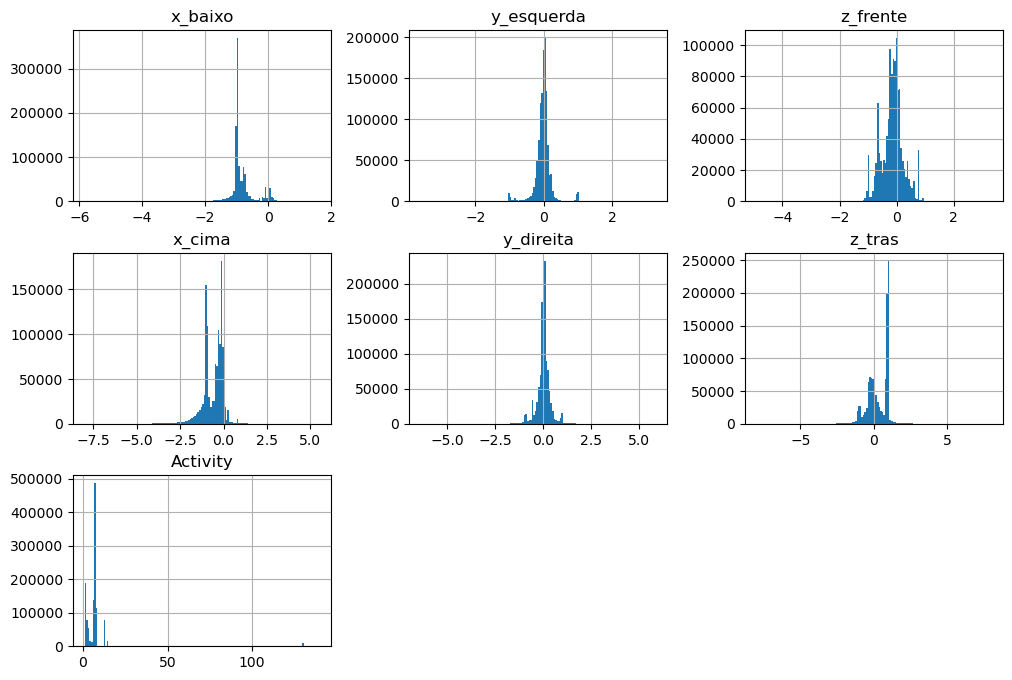

In [4]:
reco_df.hist(bins=150, figsize=(12, 8))

In [20]:
# Criando os dados de treino e teste padrão e estratificados

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

reco_train, reco_test = train_test_split(reco_df, test_size=0.3, random_state=42)
reco_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for reco_train_index, reco_test_index in reco_split.split(reco_df, reco_df.Activity):
    strat_reco_train = reco_df.loc[reco_train_index]
    strat_reco_test = reco_df.loc[reco_test_index]

In [32]:
# Colocando tudo em um dataframe

reco_target_index = reco_df.Activity.value_counts().index
reco_target_prop = reco_df.Activity.value_counts()/len(reco_df)
reco_target_test_strat_prop = strat_reco_test.Activity.value_counts()/len(strat_reco_test)

new_df = pd.DataFrame(data={
    'Activity':reco_target_index, 
    'Proportion_df':reco_target_prop, 
    'Proportion_strat_test':reco_target_test_strat_prop
    })

new_df.reset_index(drop=True)

,Activity,Proportion_df,Proportion_strat_test
0,7.0,0.407822,0.407821
1,1.0,0.158831,0.158830
2,6.0,0.116568,0.116567
3,8.0,0.094876,0.094874
4,13.0,0.064550,0.064550
5,2.0,0.064526,0.064525
6,3.0,0.045113,0.045115
7,14.0,0.014251,0.014251
8,4.0,0.013342,0.013344
9,5.0,0.010966,0.010966


In [33]:
# Acrescentando uma nova coluna sem alterar a ordem 
new_df['Proportion_std_test'] = reco_test.Activity.value_counts()/len(reco_test)

# Começando uma transformação para ajustar os valores para %
for i in list(new_df):
    if i == 'Activity':
        # Ignorar o target para esse caso de transformação
        pass
    else:
        # Ajustando os outros dados para %
        new_df[i] = (new_df[i]*100).round(4)


# Novas colunas mostrando o % de diferença entre o set proporcional de treino e o set padrão
new_df['%_strat'] = (new_df['Proportion_df'] - new_df['Proportion_strat_test'])*100
new_df['%_std'] = (new_df['Proportion_df'] - new_df['Proportion_std_test'])*100

new_df.reset_index(drop=True)

,Activity,Proportion_df,Proportion_strat_test,Proportion_std_test,%_strat,%_std
0,7.0,40.7822,40.7821,40.7318,0.01,5.04
1,1.0,15.8831,15.8830,15.9221,0.01,-3.90
2,6.0,11.6568,11.6567,11.7109,0.01,-5.41
3,8.0,9.4876,9.4874,9.4626,0.02,2.50
4,13.0,6.4550,6.4550,6.4274,0.00,2.76
5,2.0,6.4526,6.4525,6.4503,0.01,0.23
6,3.0,4.5113,4.5115,4.4791,-0.02,3.22
7,14.0,1.4251,1.4251,1.4246,0.00,0.05
8,4.0,1.3342,1.3344,1.3439,-0.02,-0.97
9,5.0,1.0966,1.0966,1.1025,0.00,-0.59
